__1.Brainstorming__.

A researcher investigated whether brainstorming is more effective for larger groups than for
smaller ones by setting up four groups of agribusiness executives, the group sizes being two, three, four, and
five, respectively. He also set up four groups of agribusiness scientists, the group sizes being the same as for
the agribusiness executives. The researcher gave each group the same problem: “How can Canada increase
the value of its agricultural exports?” Each group was allowed 30 minutes to generate ideas. The variable of
interest was the number of different ideas proposed by the group. The results, classified by type of group
(factor A) and size of group (factor B), were:


![](1.png)

__Assume that no-interaction ANOVA model is appropriate.__




### Q1

1. 20 points Plot the data in an interaction plot. Does it appear that interaction effects are present? Does
it appear that factor A and factor B main effects are present? Discuss



In [6]:
A = c(rep("A1", 4), rep("A2", 4))
B = rep(c('B1', 'B2', 'B3', 'B4'), 2)
num_ideas = c(18, 22, 31, 32, 15, 23, 29, 33)
df = data.frame(A = A, B=B, num_ideas=num_ideas)
df

A,B,num_ideas
A1,B1,18
A1,B2,22
A1,B3,31
A1,B4,32
A2,B1,15
A2,B2,23
A2,B3,29
A2,B4,33


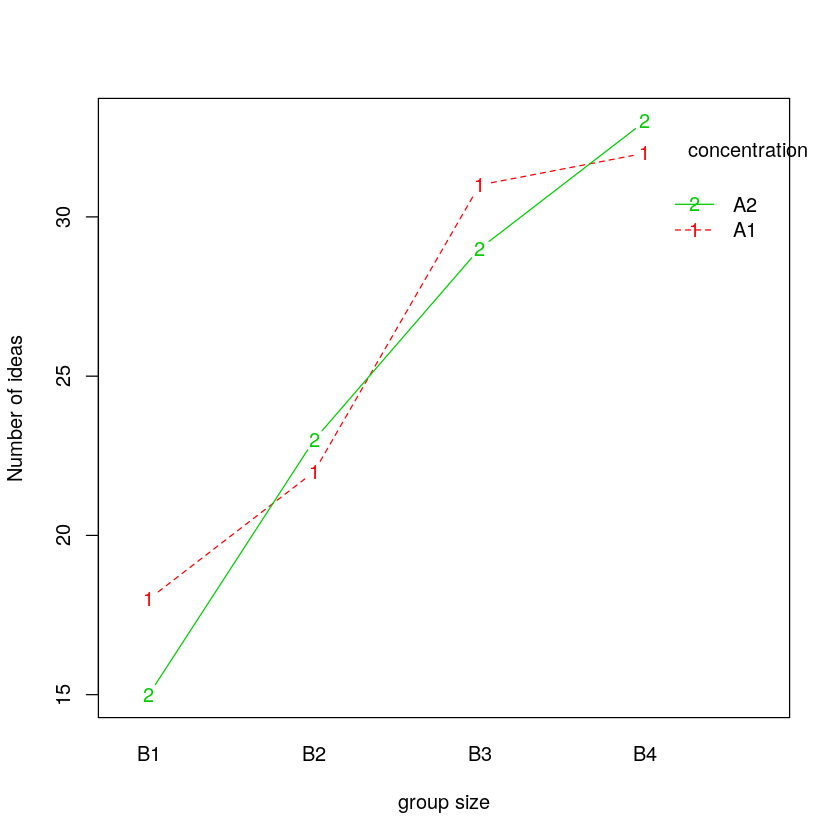

In [11]:
interaction.plot(x.factor = df$B, trace.factor = df$A,
                    response = df$num_ideas, type ="b",col = 2:3,
                    xlab ="group size", ylab ="Number of ideas", trace.label ="concentration")

The interaction plot shows a weak interaction, with the lines for concentration=A1 and concentration=A2 being nearly parallel. 

Factor A main effects are not present because with with factor A on the Y axis, the the lines for concentration A1 and A2 are almost overlapping each other, indicating that for each one of factor B, there's no significant difference between A1 and A2, 

Factor B main effects are present because with factor B on the X axis, the lines for concentration A1 and A2 are not horizontal, the absolute value of slope is relatively large,  indicating that for each one of factor A, there's significant difference among B1 to B4, thus we could conclude that factor A is present.


### Q2

2. 40 points (By hand) Conduct separate tests for type of group and size of group main effects. In each
test, use level of significance α = 0.01 and state the alternatives, decision rule, and conclusion. What is
the P-value for each test?

$$\mu_{..} = \frac{18+15+22+23+31+29+32+33}{8} = 25.375$$

$$\mu_{A1.} = \frac{18+22+31+32}{4} = 25.75$$

$$\mu_{A2.} = \frac{15+23+29+33}{4} = 25$$

$$\mu_{B1.} = \frac{18+15}{2} = 16.5$$

$$\mu_{B2.} = \frac{22+23}{2} = 22.5$$

$$\mu_{B3.} = \frac{31+29}{2} = 30$$

$$\mu_{B4.} = \frac{32+33}{2} = 32.5$$

$$SS_A = 4 \cdot (25.75-25.375)^2 + 4 \cdot (25 - 25.375)^2 = 1.125$$

$$SS_B = 2 \cdot (16.5 - 25.375)^2 + 2 \cdot (22.5 - 25.375)^2 + 2 \cdot (30 - 25.375)^2 + 2 \cdot (32.5 - 25.375)^2 = 318.375$$

$$MS_A = \frac{SS_A}{Df} = 1.125$$

$$MS_B = \frac{SS_B}{Df} = \frac{318.375}{3} = 106.125$$

$$SS_{total} = (18 - 25.375)^2 + (22 - 25.375)^2 + (31 - 25.375)^2 + (32 - 25.375)^2 + (15 - 25.375)^2+ (23 - 25.375)^2+ (29 - 25.375)^2+ (33 - 25.375)^2 = 325.875$$


$$SSE = SS_{total} - SS_A - SS_B = 325.875 - 1.125 - 106.125 = 6.375$$


$$MSE = \frac{SSE}{Df} = \frac{6.375}{3} = 2.125$$

$$F_A = \frac{MS_A}{MSE} = \frac{1.125}{2.125} = 0.529$$

$$F_B = \frac{MS_B}{MSE} = \frac{106.125}{2.125} = 49.941$$



Two-way ANOVA table
![](2.png)

In [12]:
# check my answer:
modelAB<-aov(num_ideas~A+B, data=df)
anova(modelAB)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
A,1,1.125,1.125,0.5294118,0.519497962
B,3,318.375,106.125,49.9411765,0.004641637
Residuals,3,6.375,2.125,NA,NA


__For factor A:__

Null hypothesis:

$$H_0: A_1 = A_2 = 0$$

$$H_1: \text{ there exists at least one in } A_1, A_2 \text{ that's not } 0$$

since the p value $p = 0.519 > 0.01$, so we are not confident enough to reject the null hypothesis, thus we could make the conclusion that there are no significant difference between factor $A_1$ and $A_2$. It is consistent with the result we got from the interaction plot above that the factor A main effects are not present.




__For factor B:__

Null hypothesis:


$$H_0: B_1 = B_2 = B_3 = B_4 = 0$$

$$H_1: \text{ there exist at least one in } B_1, B_2, B_3, B_4 \text{ that's not } 0$$


since the p value $p = 0.0046 < 0.01$, so we are confident enough to reject the null hypothesis, thus we could make the conclusion that there are significant difference between factor $A_1$ and $A_2$. It is consistent with the result we got from the interaction plot above that the factor B main effects are present.




### Q3

3. 40 points (By hand) Obtain confidence intervals for $D_1 = \mu_{·2} − \mu_{·1} ,D_2 = \mu_{·3} − \mu_{·2}, D_3 = \mu_{·4} - \mu_{·3}$; use the Bonferroni procedure with a 95 percent family confidence coefficient. State your findings.

In [42]:
library(multcomp)
summary(glht(aov(num_ideas~A+B, data = df), linfct = mcp(B = 'Tukey')))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = num_ideas ~ A + B, data = df)

Linear Hypotheses:
             Estimate Std. Error t value Pr(>|t|)   
B2 - B1 == 0    6.000      1.458   4.116  0.07553 . 
B3 - B1 == 0   13.500      1.458   9.261  0.00802 **
B4 - B1 == 0   16.000      1.458  10.976  0.00494 **
B3 - B2 == 0    7.500      1.458   5.145  0.04217 * 
B4 - B2 == 0   10.000      1.458   6.860  0.01905 * 
B4 - B3 == 0    2.500      1.458   1.715  0.44723   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


$$\hat D_1 = \mu_{.2} - \mu_{.1} = \frac{22+23}{2} - \frac{18+15}{2} = 6$$

$$\hat D_2 = \mu_{·3} − \mu_{·2} = \frac{31+29}{2} - \frac{22+23}{2} = 7.5$$

$$\hat D_3 = \mu_{·4} - \mu_{·3} = \frac{32+33}{2} - \frac{31+29}{2} = 2.5$$


$$S(\hat D_1) = S(\hat D_2) = S(\hat D_3) = \sqrt{MSE \cdot (\frac{1}{2} + \frac{1}{2})} = 1.458$$

$$B = t(1 - \alpha/(2g); (A - 1)(B - 1)) = t(1 - 0.05/6; 3) = t(0.99167; 3)$$


In [45]:
qt(0.99167, 3)

[1] 4.85737

$$\therefore B = 4.857$$

Thus, using the Bonferroni procedure, the 95% family-wise CI for $D_1 , D_2$ and $D_3$  is:

$$D_1: 6 \pm 4.857 \cdot 1.458 = [-1.08, 13.08]$$

$$D_2: 7.5 \pm 4.857 \cdot 1.458 = [0.42, 14.58]$$

$$D_3: 2.5 \pm 4.857 \cdot 1.458 = [-4.58, 9.58]$$



From the CI above, since 0 is included in the CI of $D_1, D_3$, 0 not included in the CI of $D_2$, thus we can conclude that there's significant difference between $\mu_{.3}$ and $\mu_{.2}$, with $\mu_{.3}$ significantly larger than $\mu_{.2}$, there not enough confidence to guarantee that there exists significant difference between $\mu_{.2}$ and $\mu_{.1}$, $\mu_{.4}$ and $\mu_{.3}$.